# The `simple_disk` Class

This Notebook will work through the functions available with the `simple_disk` class.

In [1]:
# Prep the Notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Instantiation

To start a model, simply provide the inclination, `inc`, and position angle `PA`. The position angle is measured as the angle between the red-shifted major axis and North. Both of these are given in degrees. Note that in the current implementation, only positive inclinations are allowed.

In [2]:
from simple_disk import simple_disk
disk = simple_disk(inc=30.0, PA=70.0)

## Coordinate Systems

We have two coordinate systems, the sky-frame and disk-frame. The number of pixels you have along each dimension is given by the `Npix` argument when intitialising `simple_disk`, while the field of view, `FOV`, and source distance, `dist`, parameters will dictate the size of the image.

### Disk-Plane Coordinates

In a similar fashion to the sky-frame coordinates, the disk-frame coordaintes are accessed by,

```python
x = disk.x_disk
y = disk.y_disk
```

with associated axes,

```python
xaxis = disk.xaxis_disk
yaxis = disk.yaxis_disk
```

and for `imshow` plotting,

```python
extent = disk.extent_disk
```

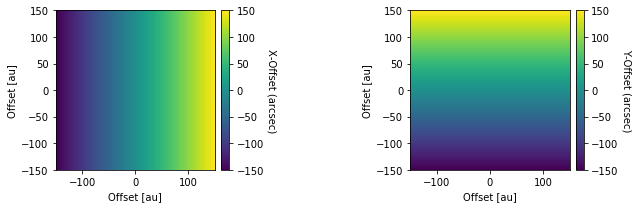

In [6]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 3))
 
ax = axs[0]  # Plot the x-axis offset.
im = ax.imshow(disk.x_disk, origin='lower', extent=disk.extent_disk)
disk.format_disk_plot(ax)
cb = plt.colorbar(im, ax=ax, pad=0.02)
cb.set_label('X-Offset (arcsec)', rotation=270, labelpad=13)

ax = axs[1]  # Plot the y-axis offset.
im = ax.imshow(disk.y_disk, origin='lower', extent=disk.extent_disk)
disk.format_disk_plot(ax)
cb = plt.colorbar(im, ax=ax, pad=0.02)
cb.set_label('Y-Offset (arcsec)', rotation=270, labelpad=13)

plt.tight_layout()

### Sky-Plane Coordinates

The on-sky pixel coordinates are accessed by:

```python
x = disk.x_sky
y = disk.y_sky
```

Both of these are two-dimensional arrays with the pixel values. If you need the axes for plotting then you can use:

```python
xaxis = disk.xaxis_sky
yaxis = disk.yaxis_sky
```

If you're using `imshow`, you can also access the extent through

```python
extent = disk.extent_sky
```

**Note:** When plotting, you'll need to flip the x-axis to account for the on-sky projection.

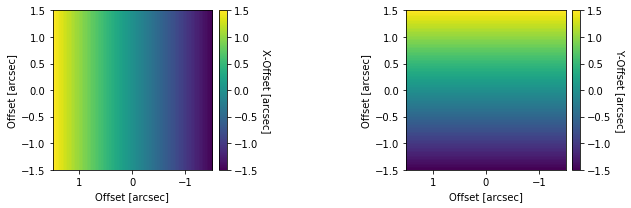

In [7]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 3))
 
ax = axs[0]  # Plot the x-axis offset.
im = ax.imshow(disk.x_sky, origin='lower', extent=disk.extent_sky)
disk.format_sky_plot(ax)
cb = plt.colorbar(im, ax=ax, pad=0.02)
cb.set_label('X-Offset [arcsec]', rotation=270, labelpad=13)

ax = axs[1]  # Plot the y-axis offset.
im = ax.imshow(disk.y_sky, origin='lower', extent=disk.extent_sky)
disk.format_sky_plot(ax)
cb = plt.colorbar(im, ax=ax, pad=0.02)
cb.set_label('Y-Offset [arcsec]', rotation=270, labelpad=13)

plt.tight_layout()

### Polar Coordinates

Both sky- and disk-frame coordinates have associated polar coordiantes, `disk.r_*` and `disk.t_*`, where the polar angles are in radians, and the radial coordiantes are in arcseconds for sky-frame and au for disk frame.


## Defining Velocity Fields

### Keplerian Rotation

Something about background Keplerian rotation stored in `disk.vkep`.

### Localized Perturbations

Something about the Gaussian perturbations.

### Building Your Own

Build you own perturbations.


## Making Pseudo-Images

In this section we describe how to made pseudo images, both as channel maps or cubes.

### Line Profiles

For simplicity we assume that the emission distribution which is made up of Gaussian profiles,

$$
I_{\nu} = T_{\rm B} \times \exp \left[ -\left( \frac{v - v_0}{\Delta v} \right)^2 \right] 
$$


The line center, `v0`, is govenered by the projected velocity field and the line peak and width are described by simple radial power laws of the form,

$$
T_{\rm B} = T_{{\rm B},\,0} \times \left( \frac{r}{100~{\rm au}} \right)^{q_{T_{\rm B}}}
\quad \text{and} \quad
\Delta v(r) = \Delta v_0 \times \left( \frac{r}{100~{\rm au}} \right)^{q_{\Delta v}}
$$

**Note:** For the linewidth we use the Doppler width, not the FWHM or standard deviation of the Gaussian.

In [ ]:
# set the brightness temperature profile
disk.set_brightness(Tb0=20.0, Tbq=-0.5)
disk.plot_brightness()

In [ ]:
# set the doppler width profile
disk.set_linewidth(dV0=150.0, dVq=-0.3)
disk.plot_linewidth()

### Making a Channel Map

Generating a channel map is done through the `disk.get_channel()` function. By default this requires the minimum and maximum velocity of the channel, `vmin` and `vmax`in m/s. The velocity field is assumed to be Keplerian, `disk.vkep`, unless any perturbations are included using the `dv0` argument.

As we have assumed a Gaussian line, integration over the profile is a simple analytical process,

$$
I_{\nu,\, {\rm chan}} = \frac{\sqrt{\pi} \, T_{\rm B}\, \Delta V}{2 (v_{\rm max} - v_{\rm min})} \left[ {\rm erf}\left( \frac{v_{\rm max} - v_0}{\Delta V} \right) - {\rm erf}\left( \frac{v_{\rm min} - v_0}{\Delta V} \right) \right]
$$

where $T_{\rm B}$ and $\Delta V$ are evaluated at the deprojected disk-frame coordinate.

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(disk.get_channel(v_min=100., v_max=300.), origin='lower', extent=disk.extent_sky)
disk.format_sky_plot(ax)

cb = plt.colorbar(im, pad=0.02)
cb.set_label('Brightness Temperature [K]', rotation=270, labelpad=13)

### Making a Data Cube

If you want instead to make an entire cube, you can use the `disk.get_cube()` function. Rather than requiring the `vmin` and `vmax` values, we require an array of channel centers, `velax`, in m/s. It is assumed that all channel are equally spaced in velocity.

### Simulating Observations

It is sometimes useful to include imaging artifacts in the data for a quick comparion.

**Note:** None of these effects will account for the spatial filtering which happens when using an interferometer.

In [ ]:
# make a flat 2D disk based on HD 163296.
disk = simple_disk(inc=30.0, PA=0.0)


dv0 = disk._azimuthal_perturbation(100., 100., 0.0, 10., 10.0)

fig, ax = plt.subplots()
im = ax.imshow(dv0, origin='lower', extent=disk.extent_disk, cmap=BuRd)
cax = make_axes_locatable(ax).append_axes('top', size='6%', pad=0.05)
cb = plt.colorbar(im, cax=cax, orientation='horizontal')
cb.set_label(r'$\delta v_{\phi} \quad [{\rm m\,s^{-1}}]$')
cax.xaxis.set_label_position('top')
cax.xaxis.set_ticks_position('top')


dv0 = disk._azimuthal_perturbation(100., 100., 0.0, 10., 10.0)

fig, ax = plt.subplots()
im = ax.imshow(disk.vkep, origin='lower', extent=disk.extent_sky, cmap=BuRd)
cax = make_axes_locatable(ax).append_axes('top', size='6%', pad=0.05)
cb = plt.colorbar(im, cax=cax, orientation='horizontal')
cb.set_label(r'$\delta v_{\phi} \quad [{\rm m\,s^{-1}}]$')
cax.xaxis.set_label_position('top')
cax.xaxis.set_ticks_position('top')
ax.set_xlim(ax.get_xlim()[1], ax.get_xlim()[0])

## Working Notes

* Define `PA` as angle between redshifted major axis and north. Increasing `PA` will rotate disk anti-clockwise in the sky frame.

* Define `t0` as the angle measured from the positive x-axis in an anti-clockwise direction in the disk frame.

* How does `t0 = 0` relate to `PA`?

#### Nicer colormap

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
c2 = plt.cm.Reds(np.linspace(0, 1, 32))
c1 = plt.cm.Blues_r(np.linspace(0, 1, 32))
colors = np.vstack((c1, np.ones(4), c2))
BuRd = mcolors.LinearSegmentedColormap.from_list('eddymap', colors)
RdBu = mcolors.LinearSegmentedColormap.from_list('eddymap', colors[::-1])

In [ ]:
# make a flat 2D disk based on HD 163296.
disk = simple_disk(inc=47.9-10., PA=312., Tb0=30.0, Tbq=-0.5, Npix=400)

In [ ]:
# doppler flip comparison.

v = 300.   # velocity of the perturbations in [m/s]
r0 = 100.  # radius of flip center in [au]
t0 = 70.    # polar angle of flip center in [deg]
dr = 10.   # radial width in [au]
dt = 20.   # arc length of flip in [au]

dr0 = 1.0 # radial separation of flip components as fraction of `dr`
dt0 = 1.0 # azimuthal separation of flip components as fraction of `dt`

# make the figure 

fig, axs = plt.subplots(ncols=4, figsize=(8, 3), gridspec_kw=dict(width_ratios=(1, 0.5, 1, 1), wspace=0.05))

# in the disk plane
ax = axs[0]
ax.scatter(0, 0, marker='x', color='0.7', lw=1.0, s=4)

dv0 = disk.doppler_flip(v, r0, t0, dr, dt, sky=False)

toplot = np.where(abs(dv0) > 1.0, dv0, np.nan)
vmax = np.nanmax(abs(toplot))

im = ax.imshow(toplot, origin='lower', vmin=-vmax, vmax=vmax, extent=disk.extent_disk, cmap=RdBu)
cax = make_axes_locatable(ax).append_axes('top', size='6%', pad=0.05)
cb = plt.colorbar(im, cax=cax, orientation='horizontal')
cb.set_label(r'$\delta v_{\phi} \quad [{\rm m\,s^{-1}}]$')
cax.xaxis.set_label_position('top')
cax.xaxis.set_ticks_position('top')
ax.contour(disk.xaxis_disk, disk.yaxis_disk, disk.r_disk, [r0], linestyles=':', linewidths=1.0, colors='0.7', zorder=-1)
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_major_locator(MultipleLocator(100))
ax.set_xlabel('Offset [au]')
ax.set_ylabel('Offset [au]')
ax.set_title('Disk Midplane', fontsize=7)

axs[1].axis('off')

# projected deviation
dv0 = disk.doppler_flip(v, r0, t0, dr, dt, sky=True)
dv0 += disk.radial_doppler_flip(v, r0, t0, dr, dt, sky=True)

ax = axs[2]
ax.scatter(0, 0, marker='x', color='0.7', lw=1.0, s=4)

toplot = np.where(abs(dv0) > 1.0, dv0, np.nan)
vmax = np.nanmax(abs(toplot))
im = ax.imshow(toplot, origin='lower', vmin=-vmax, vmax=vmax, extent=disk.extent_sky, cmap=RdBu)
cax = make_axes_locatable(ax).append_axes('top', size='6%', pad=0.05)
cb = plt.colorbar(im, cax=cax, orientation='horizontal')
cb.set_label(r'$v_0 - v_{\rm kep} \quad [{\rm m\,s^{-1}}]$')
cax.xaxis.set_label_position('top')
cax.xaxis.set_ticks_position('top')
ax.contour(disk.xaxis_sky, disk.yaxis_sky, disk.r_sky, [r0], linestyles=':', linewidths=1.0, colors='0.7', zorder=-1)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.set_xlim(ax.get_xlim()[1], ax.get_xlim()[0])
ax.set_xlabel('Offset [au]')
ax.set_ylabel('Offset [au]')
ax.set_title('On-Sky Projection', fontsize=7)

# channel map deviation

dV = 100.
temp = np.where(abs(disk.r_sky - r0) > 0.1, 1e10, disk.t_sky)
yidx, xidx = np.unravel_index(abs(temp - t0).argmin(), temp.shape)
yidx, xidx = np.unravel_index(abs(dv0).argmax(), temp.shape)
v_min = disk.vkep[yidx, xidx] - 0.5 * dV
v_max = disk.vkep[yidx, xidx] + 0.5 * dV

ax = axs[3]
ax.scatter(0, 0, marker='x', color='1.0', lw=1.0, s=4)
channel = disk.get_channel(dv0=dv0, v_min=v_min, v_max=v_max)
im = ax.imshow(channel, origin='lower', vmin=0, vmax=50, extent=disk.extent_sky, cmap='inferno')
cax = make_axes_locatable(ax).append_axes('top', size='6%', pad=0.05)
cb = plt.colorbar(im, cax=cax, orientation='horizontal')
cb.set_label(r'$T_{\rm B} \quad [{\rm K}]$')
cax.xaxis.set_label_position('top')
cax.xaxis.set_ticks_position('top')

ax.contour(disk.xaxis_sky, disk.yaxis_sky, np.where(channel > np.percentile(channel, [60]), np.nan, disk.r_sky), [r0],
           linestyles=':', linewidths=1.0, colors='1.0')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.set_xlim(ax.get_xlim()[1], ax.get_xlim()[0])
ax.set_xlabel('Offset [au]')
ax.set_yticklabels([])
ax.set_title('Representitive Channel', fontsize=7)

#plt.tight_layout()
#plt.savefig('dopplerflip_comparison.pdf', bbox_inches='tight', dpi=300)

In [ ]:
np.diff(disk.x_sky).mean()